In [1]:
import pandas as pd
data = pd.read_excel('whitewine.xlsx')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
#匯入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LogisticRegression
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import random

In [3]:
#設定xy
x=data.iloc[:,:11]
y=data["quality"]
# x
# y

In [4]:
# pd.unique(data['quality'])
data['quality'].astype("category").cat.codes
y=data["quality"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.5,random_state=40)
scaler=MinMaxScaler(feature_range=(0,1))

In [20]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [21]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
preds_knn=knn.predict(x_test)

In [22]:
print(classification_report(y_test,preds_knn,target_names=["3","4","5","6","7","8","9"]))

              precision    recall  f1-score   support

           3       0.10      0.11      0.11         9
           4       0.21      0.23      0.22        77
           5       0.52      0.59      0.55       729
           6       0.59      0.56      0.57      1110
           7       0.49      0.47      0.48       434
           8       0.39      0.20      0.26        86
           9       0.00      0.00      0.00         4

    accuracy                           0.53      2449
   macro avg       0.33      0.31      0.31      2449
weighted avg       0.53      0.53      0.53      2449



C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print(knn.score(x_train,y_train))
print(accuracy_score(y_test,preds_knn))

0.7586770110249081
0.5296039199673336


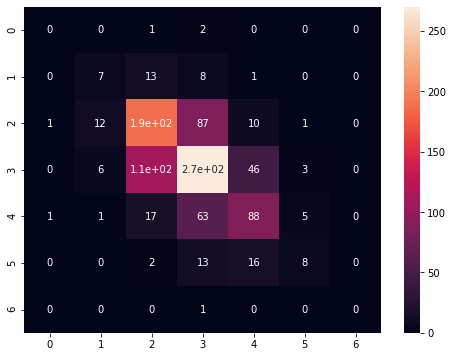

In [10]:
cm=confusion_matrix(y_test,preds_knn)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()

In [11]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import roc_curve
Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])

def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(y_test, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(y_test, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(y_test, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(y_test, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(y_test, pred_prob, multi_class='ovr'),3)*100 #[:, 1]
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(y_test, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(y_test, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(y_test, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred))
    
    auc_roc(y_test, pred_prob, curves=['each_class'])
    plt.show()

In [12]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='f1_weighted', n_jobs=-1, cv=4, random_state=1)

KNN = RCV.fit(x_train, y_train).best_estimator_
pred = KNN.predict(x_test)
pred_prob = KNN.predict_proba(x_test)
from sklearn.metrics import classification_report, confusion_matrix
Classification_Summary(pred,pred_prob,5)

C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classifi

<<<----------------------------------- Evaluating 5 ----------------------------------->>>

Accuracy = 67.80000000000001%
F1 Score = 66.9%

 Confusiton Matrix:
 [[  0   0   1   2   0   0   0]
 [  0   4  13  11   1   0   0]
 [  0   1 204  84   9   0   0]
 [  0   0  69 334  31   1   0]
 [  0   0   1  71 102   1   0]
 [  0   0   0   7  12  20   0]
 [  0   0   0   1   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.80      0.14      0.24        29
           5       0.71      0.68      0.70       298
           6       0.65      0.77      0.71       435
           7       0.66      0.58      0.62       175
           8       0.91      0.51      0.66        39
           9       0.00      0.00      0.00         1

    accuracy                           0.68       980
   macro avg       0.53      0.38      0.42       980
weighted avg       0.68      0.68      0.67       980


NameError: name 'auc_roc' is not defined

In [13]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [16]:
x=np.array(x)
y=np.array(y)
from mlxtend.plotting import plot_decision_regions
def knn_comparison():
    value=1.5
# Plotting decision region
    plot_decision_regions(x, y, clf=knn, legend=2,feature_index=[0,6],
                      filler_feature_values={0:value,1:value,2: value, 3:value, 4:value, 5:value, 6:value, 7:value, 8:value,9:value, 10:value})
# Adding axes annotations
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Knn with K=')
    plt.show()

In [18]:
knn_comparison()

TypeError: knn_comparison() takes 0 positional arguments but 1 was given

In [ ]:
x